In [42]:
import pandas as pd
import numpy as np
import os
import json
import nltk
nltk.download('udhr')
nltk.download('vader_lexicon')
from nltk.corpus import udhr
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import re
regex = r"\b[aà]\b"

[nltk_data] Downloading package udhr to /home/ibr/nltk_data...
[nltk_data]   Package udhr is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ibr/nltk_data...


In [3]:
def to_lower(array_string):
    ret_value = []
    for i in array_string:
        ret_value.append(i.lower())
    return ret_value

In [4]:
def get_all_comment(comment_column):
    commentaires = []
    for i in comment_column:
        for j in i:
            comment = j['Comment'].lower()
            commentaires.append(comment)
    return commentaires

In [5]:
def tokenize(messages):
    tokenize_message = []
    for i in messages:
        tokenize_message.append(nltk.word_tokenize(i, language='french'))
    return tokenize_message

In [6]:
def cleaning(messages, stopWords):
    clean_words = []
    for i in messages:
        tokens = []
        for token in i:
            if token not in stopWords:
                token = token.replace('’', '')
                token = re.sub(regex, '', token, flags=re.MULTILINE)
                tokens.append(token)
        clean_words.append(tokens)
    return clean_words

In [7]:
def stemisation(messages):
    # stemmer = SnowballStemmer(language='french')
    stemmer = FrenchStemmer()
    stemmer_words = []
    for i in messages:
        stems = []
        for stem in i:
            stems.append(stemmer.stem(stem))
        # stems = set(stems)
        stemmer_words.append(stems)
    return stemmer_words
    

In [8]:
file_path = os.path.join(os.getcwd(), "dataset/dataset_lien_le_fasonet.json") 

In [9]:
data = pd.read_json(file_path)

In [10]:
#data.head(10)

In [11]:
commentaires_corpus = get_all_comment(data['Comments'])

In [12]:
french_words = udhr.words('French_Francais-Latin1')

In [13]:
words = to_lower(french_words)

In [14]:
text = nltk.Text(words)

In [15]:
nltk.download('stopwords')
stpw = stopwords.words('french')
stpw.append(',')
stpw.append(';')
stpw.append('.')
stpw.append('%')
stpw.append("'")
stpw.append(':')
stpw.append('l')
stpw.append('qu')
stpw.append('au')
stpw.append('!')
stpw.append('?')
stpw.append('d')
stpw.append('(')
stpw.append(')')
stpw.append('`')
stpw.append("'")
stpw.append(itm for itm in ['’',"''",'a'])
stpw.append(itm for itm in ["’","a","plus","comme","cet","bien","san","être","''","``","leur","cel","peut","dit","ceux","bon", 'ça','à'])
stpw = set(stpw)

[nltk_data] Downloading package stopwords to /home/ibr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Chargement des données de tendances

In [16]:
tendances = ['EI','EIS','FAMa','FAR','FDS','GANE','IED','JNIM','MINUSMA','MPSR','RN','VDP','ZIM','etat islamique','etat islamique du sahel','Forces armees du Mali','Forces armees regulieres','Groupes Arme Non Etatique','Engins explosifs improvises','Jamaat Nasr Al islam wa Al mouslimin','Mission Multidimensionnelle Integree des Nations Unies pour la Stabilisation au Mali','Mouvement Patriotique pour la Sauvegarde et la Restauration','Route Nationale','Volontaires de defense pour la Patrie','Zone d\'interet militaire']

In [17]:
tendances= to_lower(tendances)

In [18]:
## Cleanning data

## Tokenisation

In [19]:
#tokenized_commentaire = nltk.word_tokenize(commentaires_corpus, language='french')
tokenize_comment = tokenize(commentaires_corpus)
tokenize_tendance = tokenize(tendances)

In [20]:
commentaire_clean = cleaning(tokenize_comment, stpw)
tendance_clean = cleaning(tokenize_tendance, stpw)

## racinisation

In [21]:
# comment_stems= stemisation([['commentaire', 'commenter']])
comment_stems= stemisation(commentaire_clean)
tendance_stems= stemisation(tendance_clean)
flat_tendance = [item for line in tendance_stems for item in line]

In [22]:
flat_comment = [item for line in comment_stems for item in line]

terror      12946
pay         10244
si           9731
plus         9710
comm         8825
cet          8681
fait         7645
burkin       7634
faut         7465
fd           6885
tous         6819
fair         6743
autr         6648
bien         5985
san          5652
être         5533
''           5522
``           5380
leur         5338
armé         4875
attaqu       4817
dieu         4804
franc        4636
peupl        4548
contr        4485
cel          4407
militair     4336
peut         4333
car          4242
faso         4241
dit          4192
quand        4111
dir          4101
ceux         4062
popul        4002
mal          3945
bon          3929
forc         3927
auss         3857
seul         3742
ça           3715
rien         3528
temp         3524
person       3506
certain      3498
sécur        3498
paix         3491
part         3403
gouvern      3389
vrai         3349
dtype: int64

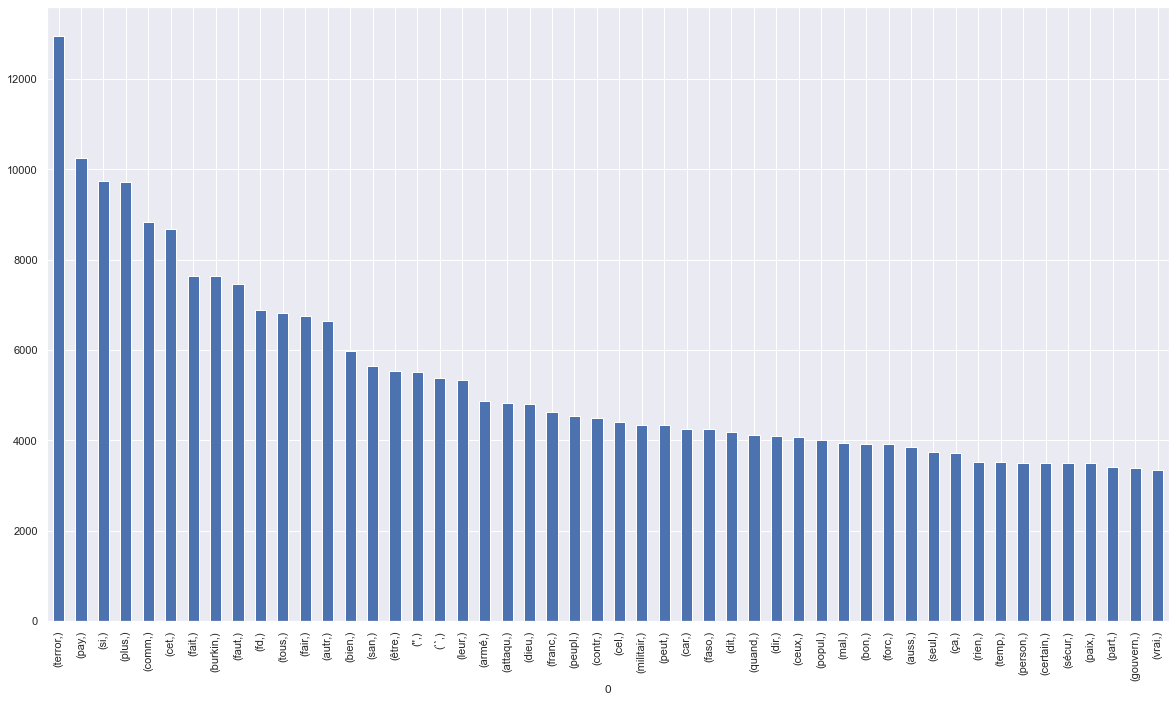

In [82]:
df_comment = pd.DataFrame(flat_comment)
df_comment.value_counts()[0]
top_50 = df_comment.value_counts().iloc[2:52]
top_50.plot(kind='bar')
top_50.to

<Figure size 432x288 with 0 Axes>

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [60]:
sia = SentimentIntensityAnalyzer()
plt.figure(figsize=(12,4))
comments_rec = []
for k in comment_stems:
    comments_rec.append(' '.join(k))

sentiment = [] 
for mess in comments_rec:
    sentiment.append(sia.polarity_scores(mess))


st_frame =pd.DataFrame(sentiment, columns=['neg','neu', 'pos','compound'])

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.053,0.947,0.000,-0.1027
2,0.074,0.926,0.000,-0.3400
3,0.000,1.000,0.000,0.0000
4,0.041,0.936,0.023,-0.2263
...,...,...,...,...
27596,0.000,0.867,0.133,0.6542
27597,0.107,0.839,0.054,-0.7579
27598,0.000,1.000,0.000,0.0000
27599,0.063,0.868,0.069,0.0516


<Figure size 864x288 with 0 Axes>

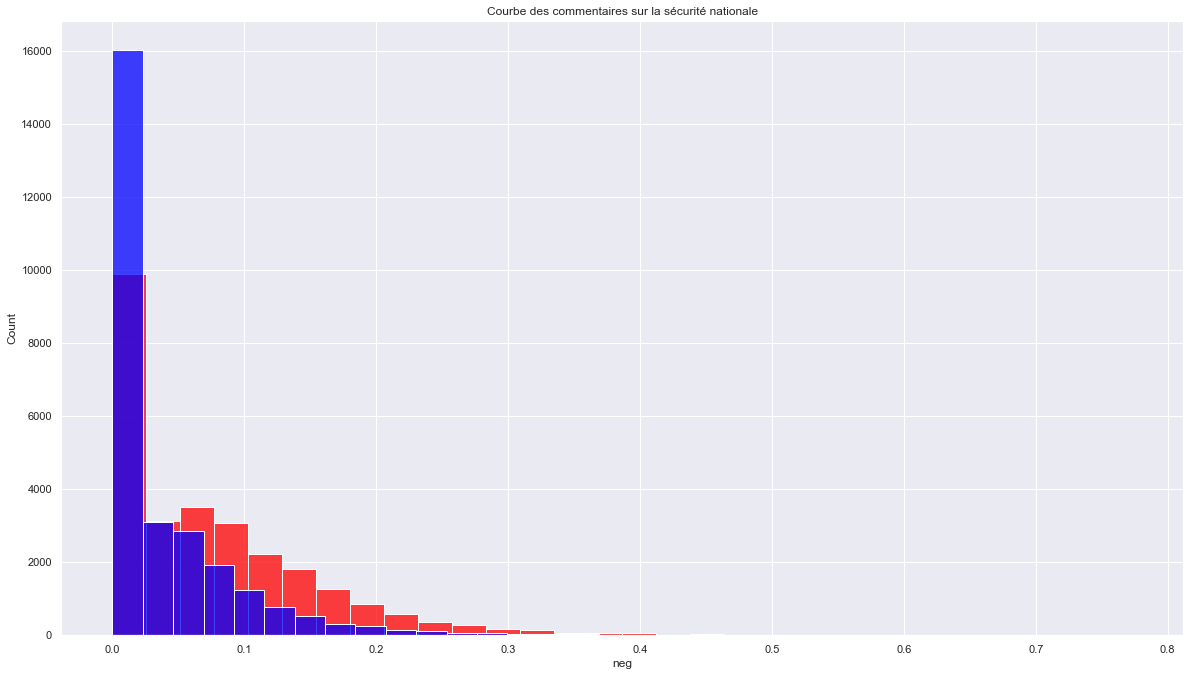

In [79]:
sns.set(rc={'figure.figsize':(20.10,11.30)})
sns.histplot(st_frame['neg'], bins=30, kde=False, 
             color='red', label='negative', legend='Negative')
sns.histplot(st_frame['pos'], bins=30, kde=False, 
             color='blue', label='Positive', legend='Positive')
# fig = plt.figure(figsize =(10, 7))
# plt.bar(st_frame['neg'], st_frame['pos'])
plt.savefig('output.png')
plt.title(f'Courbe des commentaires sur la sécurité nationale');